In [1]:
import pandas as pd
train_df = pd.read_csv('./Titanic/train.csv')
test_df = pd.read_csv('./Titanic/test.csv')
combine = [train_df, test_df]

In [2]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_df[["Age","SibSp","Parch","Fare"]].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [5]:
test_df[["Age","SibSp","Parch","Fare"]].describe()

,Age,SibSp,Parch,Fare
count,332.000000,418.000000,418.000000,417.000000
mean,30.272590,0.447368,0.392344,35.627188
std,14.181209,0.896760,0.981429,55.907576
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hickman, Mr. Stanley George",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

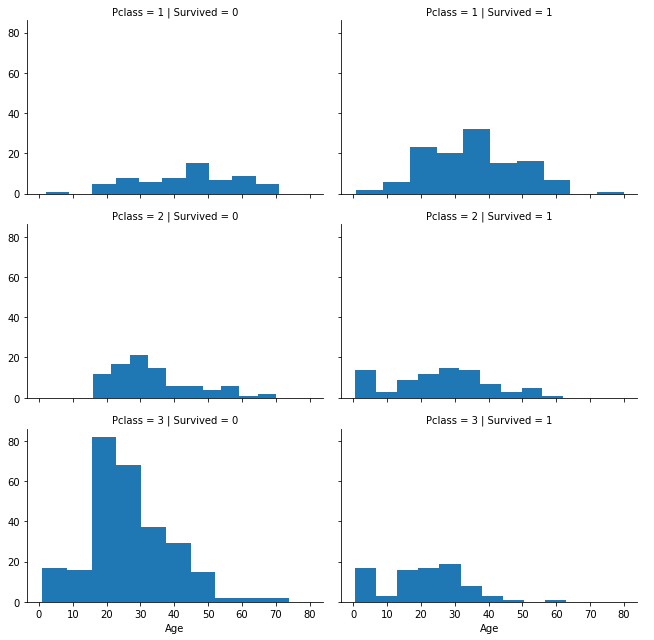

In [10]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.5)
g.map(plt.hist, 'Age')
g.add_legend()

C:\Users\Yunch\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Yunch\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


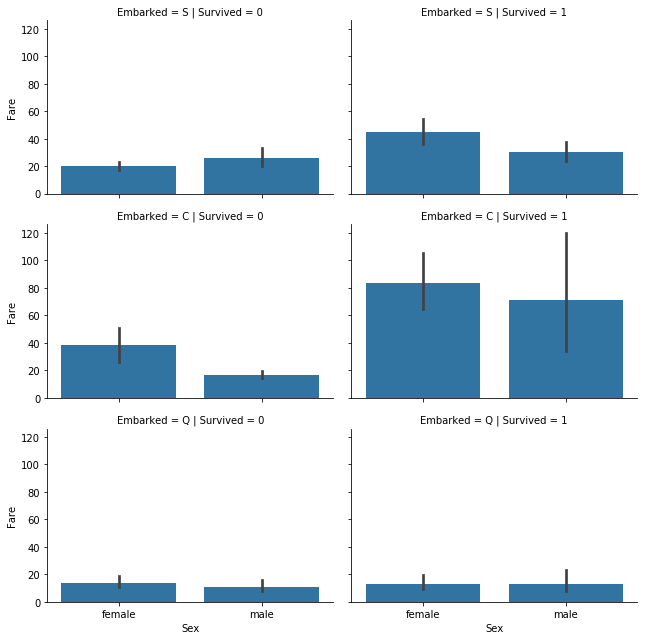

In [11]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.5)
g.map(sns.barplot, 'Sex', 'Fare')
g.add_legend()

In [12]:
train_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hickman, Mr. Stanley George",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"McCaffry, Mr. Thomas Francis",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [14]:
train_df = train_df.drop(['Ticket', 'Cabin', 'Name','PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'Name','PassengerId'], axis=1)
combine = [train_df, test_df]

In [15]:
for data in combine:
    data['Gender'] = data['Sex'].map({'female':1, 'male':0}).astype(int)
    
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
886,0,2,male,27.0,0,0,13.00,S,0
887,1,1,female,19.0,0,0,30.00,S,1
888,0,3,female,NaN,1,2,23.45,S,1
889,1,1,male,26.0,0,0,30.00,C,0
890,0,3,male,32.0,0,0,7.75,Q,0


In [16]:
import numpy as np

for data in combine:
    data.loc[data.Age.isnull(), 'Age'] = round(np.random.normal(29.699118, 14.526497),1)

train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
886,0,2,male,27.0,0,0,13.00,S,0
887,1,1,female,19.0,0,0,30.00,S,1
888,0,3,female,35.8,1,2,23.45,S,1
889,1,1,male,26.0,0,0,30.00,C,0
890,0,3,male,32.0,0,0,7.75,Q,0


In [17]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
886,0,2,male,27.0,0,0,13.00,S,0
887,1,1,female,19.0,0,0,30.00,S,1
888,0,3,female,35.8,1,2,23.45,S,1
889,1,1,male,26.0,0,0,30.00,C,0
890,0,3,male,32.0,0,0,7.75,Q,0


In [18]:
mean_ages = np.zeros((3,2))
std_ages = np.zeros((3,2))
for dataset in combine:

    for j in range(0, 3):
        for k in range(0,2):
            age_df = dataset[(dataset['Pclass'] == j+1) & \
                               (dataset['Gender'] == k)]['Age'].dropna()

            mean_ages[j,k] = int(age_df.mean()/0.5 + 0.5)*0.5
            std_ages[j,k] = int(age_df.std()/0.5 + 0.5)*0.5


    for j in range(0, 3):
        for k in range(0,2):
            dataset.loc[ (dataset.Age.isnull())  & (dataset.Pclass == j+1) & (dataset.Gender == k),\
                'Age'] = np.random.normal(mean_ages[j,k],std_ages[j,k])

    dataset['Age'] = dataset['Age'].astype(int)



In [19]:
for data in combine:
    data.loc[data.Embarked.isnull(), 'Embarked'] = 'S'


In [20]:
for data in combine:
    data.loc[data.Fare.isnull(), 'Fare'] = 32.204208

In [21]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)

train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081
